In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import csv

csvpath = os.path.join('data_export','subgroup_EOC.csv')
subgroup_data = pd.read_csv(csvpath)



# Create a summar table for public school zipcodes

In [2]:
# load the excel into pandas
df_enrollment = pd.read_excel('dataset/C11_FY2019_HS Graduates 2017_Enrolled in College in 16 Mos_Redacted (2).xlsx')

In [3]:
# setting up the correct column names
# isolate the datapoints that we are interested in
all_school = df_enrollment.iloc[:,0:7].iloc[1:,]
# set new vlaues for columns
all_school.columns = all_school.iloc[0]
# remove the duplicate column names and reset the index
all_school = all_school.loc[2:,:].reset_index(drop = True)

In [4]:
# create df for aggregate information on all the schoool districts
school_all = all_school.loc[all_school['School Code'] == 'ALL']
# create df for the individual school codes
school_district = all_school.loc[all_school['School Code'] != 'ALL']
school_district

1,School Year,School District Code,School District Name,School Code,School Name,Total High School Graduates,Number of High School Graduates Enrolled in Postsecondary Institution
0,2017,601,Appling County,103,Appling County High School,198,118
2,2017,602,Atkinson County,103,Atkinson County High School,97,60
4,2017,603,Bacon County,302,Bacon County High School,118,66
6,2017,604,Baker County,105,Baker County K12 School,18,TFS
8,2017,605,Baldwin County,189,Baldwin High School,271,171
...,...,...,...,...,...,...,...
627,2017,891,Department of Juvenile Justice,298,Augusta Youth Development Campus,TFS,TFS
628,2017,891,Department of Juvenile Justice,598,Macon Youth Development Campus,TFS,TFS
629,2017,891,Department of Juvenile Justice,898,Eastman Youth Development Campus,TFS,TFS
630,2017,891,Department of Juvenile Justice,4199,Millegeville ITU,TFS,TFS


In [5]:
# identify the performance metrics that we want to use for analysis
performance_metrics = school_all[['School District Code','Total High School Graduates','Number of High School Graduates Enrolled in Postsecondary Institution']]
performance_metrics

1,School District Code,Total High School Graduates,Number of High School Graduates Enrolled in Postsecondary Institution
1,601,198,118
3,602,97,60
5,603,118,66
7,604,18,TFS
9,605,271,171
...,...,...,...
621,793,167,114
623,7991893,TFS,TFS
625,7991895,TFS,TFS
632,891,20,10


In [6]:
#create a backup 
school_all.to_csv('data_export/school_all.csv',index=False)
df = school_all.copy()


In [7]:
# reorganize the dataframe for the columns
df.columns = ['School Year', 'School District Code', 'School District Name',
       'School Code', 'School Name', 'Graduates',
       'Postsecondary Institution']

df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution
1,2017,601,Appling County,ALL,All Schools,198,118
3,2017,602,Atkinson County,ALL,All Schools,97,60
5,2017,603,Bacon County,ALL,All Schools,118,66
7,2017,604,Baker County,ALL,All Schools,18,TFS
9,2017,605,Baldwin County,ALL,All Schools,271,171
...,...,...,...,...,...,...,...
621,2017,793,Vidalia City,ALL,All Schools,167,114
623,2017,7991893,State Schools- Atlanta Area School for the Deaf,ALL,All Schools,TFS,TFS
625,2017,7991895,State Schools- Georgia School for the Deaf,ALL,All Schools,TFS,TFS
632,2017,891,Department of Juvenile Justice,ALL,All Schools,20,10


In [8]:
# drop all the rows where there are anhy value "TFS" in the cells
school_no_TFS = df.replace('TFS', np.nan).dropna()
school_no_TFS

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution
1,2017,601,Appling County,ALL,All Schools,198.0,118.0
3,2017,602,Atkinson County,ALL,All Schools,97.0,60.0
5,2017,603,Bacon County,ALL,All Schools,118.0,66.0
9,2017,605,Baldwin County,ALL,All Schools,271.0,171.0
11,2017,606,Banks County,ALL,All Schools,209.0,108.0
...,...,...,...,...,...,...,...
617,2017,791,Trion City,ALL,All Schools,88.0,69.0
619,2017,792,Valdosta City,ALL,All Schools,374.0,247.0
621,2017,793,Vidalia City,ALL,All Schools,167.0,114.0
632,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0


In [9]:
# reset the index for the dataframe
school_no_TFS = school_no_TFS.reset_index(drop=True)
# remove the aggregate School District Code data at the end of the dataset
school_no_TFS = school_no_TFS.iloc[:185]
school_no_TFS

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution
0,2017,601,Appling County,ALL,All Schools,198.0,118.0
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0
4,2017,606,Banks County,ALL,All Schools,209.0,108.0
...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0
181,2017,791,Trion City,ALL,All Schools,88.0,69.0
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0


In [10]:
# create a column for the percentage of students that went to college after graduation
percent = (school_no_TFS['Postsecondary Institution'] / school_no_TFS['Graduates']*100).round(2)
school_no_TFS['Percent'] = percent
school_no_TFS

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.60
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0,61.86
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0,55.93
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0,63.10
4,2017,606,Banks County,ALL,All Schools,209.0,108.0,51.67
...,...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0,79.35
181,2017,791,Trion City,ALL,All Schools,88.0,69.0,78.41
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0,66.04
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0,68.26


<AxesSubplot:xlabel='School District Code'>

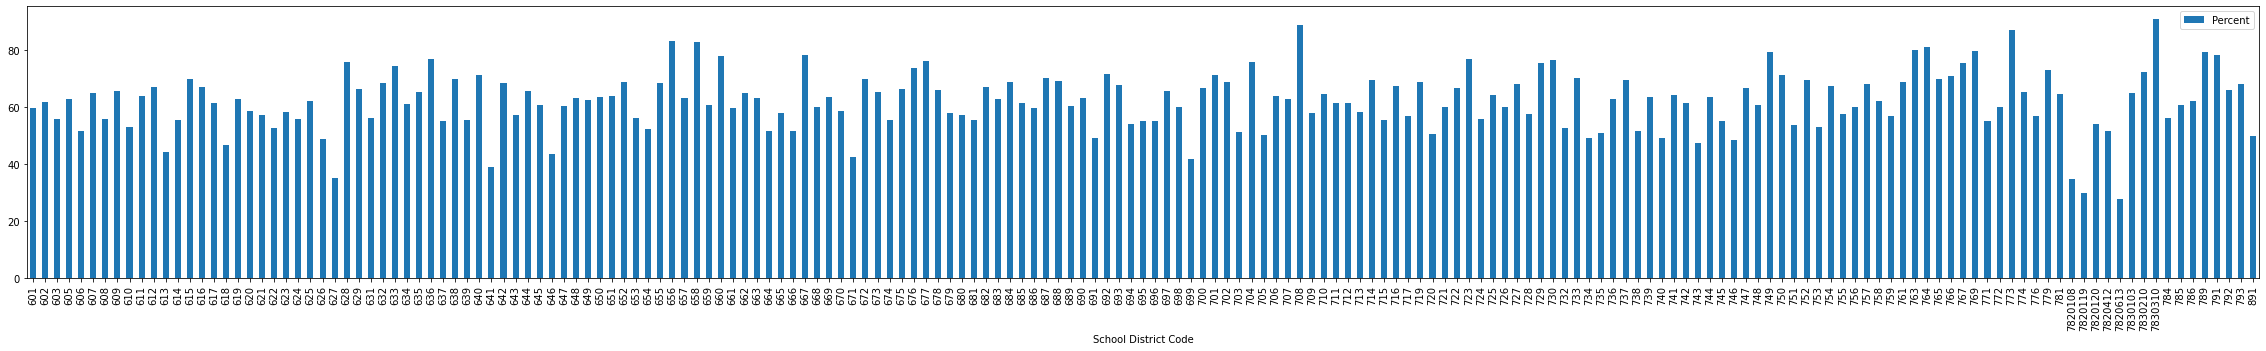

In [11]:
# generate the bar graph of college enrollment percentage per county
school_no_TFS.plot.bar(x='School District Code', y='Percent', figsize = (40,5))

In [12]:
school_no_TFS = school_no_TFS.loc[school_no_TFS['School District Code']<1000]

In [13]:
school_sorted = school_no_TFS.sort_values('Percent', ascending = False)

In [14]:
school_sorted.head()


,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
105,2017,708,Oconee County,ALL,All Schools,553.0,491.0,88.79
164,2017,773,Decatur City,ALL,All Schools,254.0,221.0,87.01
53,2017,656,Fayette County,ALL,All Schools,1575.0,1312.0,83.30
55,2017,658,Forsyth County,ALL,All Schools,3020.0,2502.0,82.85
157,2017,764,Buford City,ALL,All Schools,269.0,218.0,81.04


In [15]:
school_sorted.sort_values('Percent').head()

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
25,2017,627,Chattooga County,ALL,All Schools,215.0,76.0,35.35
38,2017,641,Dade County,ALL,All Schools,125.0,49.0,39.20
96,2017,699,Meriwether County,ALL,All Schools,155.0,65.0,41.94
68,2017,671,Haralson County,ALL,All Schools,223.0,95.0,42.60
43,2017,646,Dooly County,ALL,All Schools,92.0,40.0,43.48


In [16]:
# Create checkpoint for cleaned performance metics dataframe
school_clean = school_no_TFS.copy()

In [17]:
# Export dataframe to csv
school_clean = school_no_TFS
school_clean.to_csv('data_export/school_clean.csv',index=False)

In [18]:
import random
random_list = []
for index in range(school_sorted['School District Code'].count()):
    random_list.append(random.randrange(school_sorted['School District Code'].count()))
    
index_list = random_list[:100]

In [19]:
rand_school_data = school_sorted.iloc[index_list]
rand_school_data

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0,79.35
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0,68.26
84,2017,687,Laurens County,ALL,All Schools,376.0,264.0,70.21
13,2017,615,Bryan County,ALL,All Schools,573.0,400.0,69.81
12,2017,614,Brooks County,ALL,All Schools,97.0,54.0,55.67
...,...,...,...,...,...,...,...,...
166,2017,776,Gainesville City,ALL,All Schools,396.0,225.0,56.82
48,2017,651,Effingham County,ALL,All Schools,756.0,483.0,63.89
122,2017,726,Griffin-Spalding County,ALL,All Schools,536.0,323.0,60.26
127,2017,732,Tattnall County,ALL,All Schools,194.0,102.0,52.58


In [20]:
subgroup_data
subgroup_data = subgroup_data.loc[subgroup_data["School District Code"] != "ALL"]
subgroup_data["School District Code"] = subgroup_data["School District Code"].astype(int)
subgroup_data


,Unnamed: 0,School District Code,SUBGROUP_NAME,ACDMC_LVL,BEGIN_PCT,DEVELOPING_PCT,PROFICIENT_PCT,DISTINGUISHED_PCT
0,1,601,Black or African American,10.333333,38.044444,36.966667,23.500000,1.477778
1,2,601,Economically Disadvantaged,10.133333,33.393333,32.946667,26.986667,6.666667
2,3,601,Female,10.200000,18.490000,34.810000,38.340000,8.360000
3,4,601,Hispanic,10.333333,19.211111,40.977778,35.644444,4.188889
4,5,601,Male,10.133333,35.920000,32.500000,24.846667,6.726667
...,...,...,...,...,...,...,...,...
2105,2302,891,Not Economically Disadvantaged,9.750000,80.170833,15.862500,3.216667,0.745833
2106,2303,891,Not Limited English Proficient,9.692308,80.265385,15.753846,3.300000,0.669231
2107,2304,891,Students with Disabilities,9.666667,87.050000,12.950000,0.000000,0.000000
2108,2305,891,Students without Disabilities,9.882353,74.576471,20.505882,4.805882,0.123529


In [21]:
deletecolumns = ["School Year", "School District Name", "School Code", "School Name"]
rand_school_data_df1 = rand_school_data.drop(deletecolumns, 1)
rand_school_data_df1

,School District Code,Graduates,Postsecondary Institution,Percent
180,789,155.0,123.0,79.35
183,793,167.0,114.0,68.26
84,687,376.0,264.0,70.21
13,615,573.0,400.0,69.81
12,614,97.0,54.0,55.67
...,...,...,...,...
166,776,396.0,225.0,56.82
48,651,756.0,483.0,63.89
122,726,536.0,323.0,60.26
127,732,194.0,102.0,52.58


In [22]:
merged_subgroup = pd.merge(rand_school_data_df1, subgroup_data, on="School District Code", how="inner")
merged_subgroup = merged_subgroup.dropna()
merged_subgroup

,School District Code,Graduates,Postsecondary Institution,Percent,Unnamed: 0,SUBGROUP_NAME,ACDMC_LVL,BEGIN_PCT,DEVELOPING_PCT,PROFICIENT_PCT,DISTINGUISHED_PCT
0,789,155.0,123.0,79.35,2245,Black or African American,10.444444,62.950000,23.483333,12.511111,1.055556
1,789,155.0,123.0,79.35,2246,Economically Disadvantaged,10.250000,50.650000,19.370000,20.265000,9.710000
2,789,155.0,123.0,79.35,2247,Female,10.153846,43.638462,22.923077,25.776923,7.684615
3,789,155.0,123.0,79.35,2248,Male,10.142857,48.664286,23.750000,21.378571,6.214286
4,789,155.0,123.0,79.35,2249,Non-Migrant,10.250000,50.650000,19.370000,20.265000,9.710000
...,...,...,...,...,...,...,...,...,...,...,...
1090,726,536.0,323.0,60.26,1527,Not Limited English Proficient,10.368421,47.955263,24.830263,22.647368,4.565789
1091,726,536.0,323.0,60.26,1528,Students with Disabilities,10.285714,77.676190,17.504762,4.809524,0.000000
1092,726,536.0,323.0,60.26,1529,Students without Disabilities,10.366197,43.578873,27.115493,24.211268,5.111268
1093,726,536.0,323.0,60.26,1530,Two or More Races,10.153846,29.615385,34.946154,31.123077,4.338462


In [23]:
beg_dev_grade = (merged_subgroup['BEGIN_PCT'] + merged_subgroup["DEVELOPING_PCT"]).round(2)
merged_subgroup['Beg_Dev_Grade'] = beg_dev_grade
merged_subgroup

,School District Code,Graduates,Postsecondary Institution,Percent,Unnamed: 0,SUBGROUP_NAME,ACDMC_LVL,BEGIN_PCT,DEVELOPING_PCT,PROFICIENT_PCT,DISTINGUISHED_PCT,Beg_Dev_Grade
0,789,155.0,123.0,79.35,2245,Black or African American,10.444444,62.950000,23.483333,12.511111,1.055556,86.43
1,789,155.0,123.0,79.35,2246,Economically Disadvantaged,10.250000,50.650000,19.370000,20.265000,9.710000,70.02
2,789,155.0,123.0,79.35,2247,Female,10.153846,43.638462,22.923077,25.776923,7.684615,66.56
3,789,155.0,123.0,79.35,2248,Male,10.142857,48.664286,23.750000,21.378571,6.214286,72.41
4,789,155.0,123.0,79.35,2249,Non-Migrant,10.250000,50.650000,19.370000,20.265000,9.710000,70.02
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,726,536.0,323.0,60.26,1527,Not Limited English Proficient,10.368421,47.955263,24.830263,22.647368,4.565789,72.79
1091,726,536.0,323.0,60.26,1528,Students with Disabilities,10.285714,77.676190,17.504762,4.809524,0.000000,95.18
1092,726,536.0,323.0,60.26,1529,Students without Disabilities,10.366197,43.578873,27.115493,24.211268,5.111268,70.69
1093,726,536.0,323.0,60.26,1530,Two or More Races,10.153846,29.615385,34.946154,31.123077,4.338462,64.56


In [24]:
def bar_graph(merged_subgroup, description ):
    instruction_df = merged_subgroup.loc[(merged_subgroup["SUBGROUP_NAME"] == description)]
    instruction_df.drop_duplicates()
    z = (stats.zscore(instruction_df.loc[:,"Beg_Dev_Grade"]))
    instruction_df.loc[:,(f'{description}_zscore')] = z
    instruction_df = instruction_df.loc[(instruction_df[f'{description}_zscore']<2) & (instruction_df[f'{description}_zscore']>-2)]
    x_values = instruction_df['Beg_Dev_Grade']
    y_values = instruction_df['Percent']
    plt.scatter(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    print(intercept)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.xlabel(f"{description}")
    plt.ylabel('% of Graduates into College')
    plt.title(f"{description} vs. Into College ")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    print(f"The intercept value is: {intercept}")
    print(f"The p-value is: {pvalue}")
    plt.show()


C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


85.38431075659109
The r-value is: 0.10334176597338672
The intercept value is: 85.38431075659109
The p-value is: 0.0027000883966854503


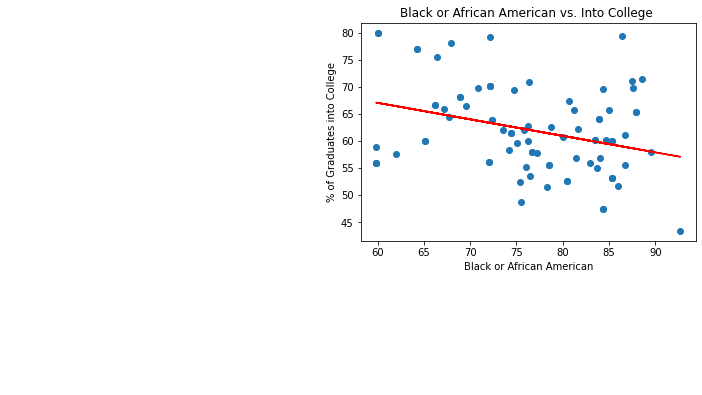

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


52.36036033797325
The r-value is: 0.018859892751304685
The intercept value is: 52.36036033797325
The p-value is: 0.18446971949844182


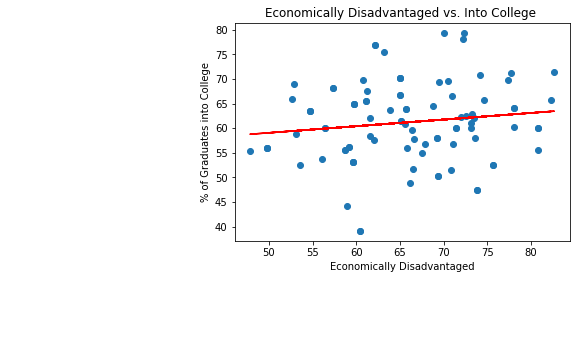

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


64.52616547862547
The r-value is: 0.006640920436536618
The intercept value is: 64.52616547862547
The p-value is: 0.4299317777210131


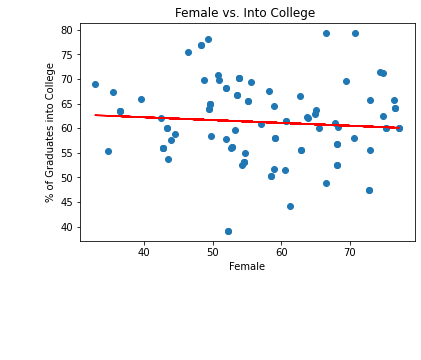

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


63.45878290652658
The r-value is: 0.0021736977655542676
The intercept value is: 63.45878290652658
The p-value is: 0.6519383677141883


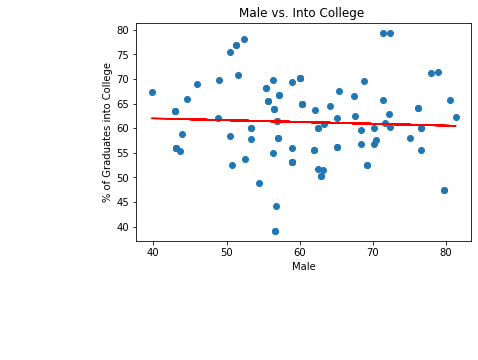

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


63.25530683363448
The r-value is: 0.0015280727579767184
The intercept value is: 63.25530683363448
The p-value is: 0.7098782782431619


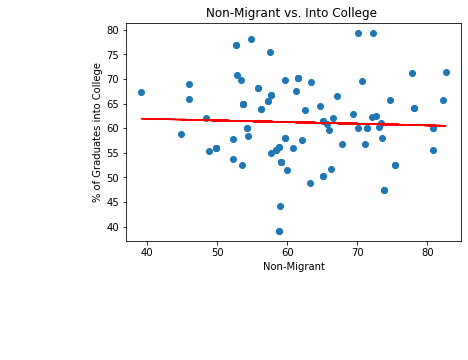

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


62.99639893735298
The r-value is: 0.0012306940054518899
The intercept value is: 62.99639893735298
The p-value is: 0.7385014074036962


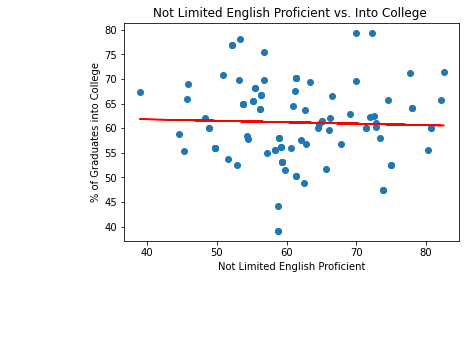

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


80.495633812932
The r-value is: 0.029953719076172492
The intercept value is: 80.495633812932
The p-value is: 0.11103387944914284


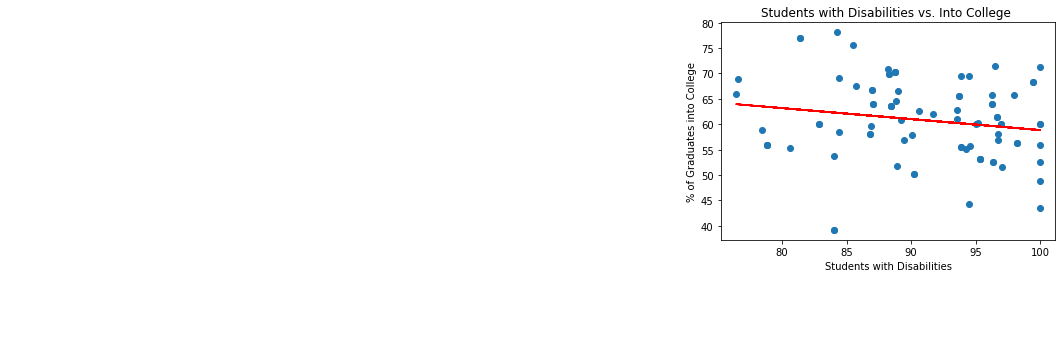

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


61.085478978224636
The r-value is: 4.321901761721023e-06
The intercept value is: 61.085478978224636
The p-value is: 0.984221080181541


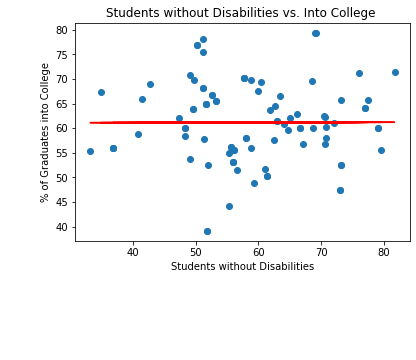

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


72.27051543318521
The r-value is: 0.08706133910545735
The intercept value is: 72.27051543318521
The p-value is: 0.004521231481714632


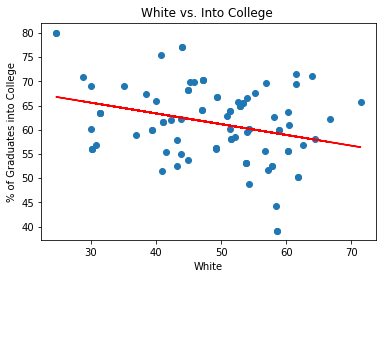

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


71.22332791628311
The r-value is: 0.04171960251828869
The intercept value is: 71.22332791628311
The p-value is: 0.13847322670868373


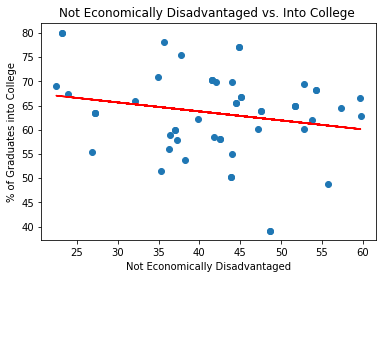

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


79.72049183354139
The r-value is: 0.1538905346311586
The intercept value is: 79.72049183354139
The p-value is: 0.001473507017175856


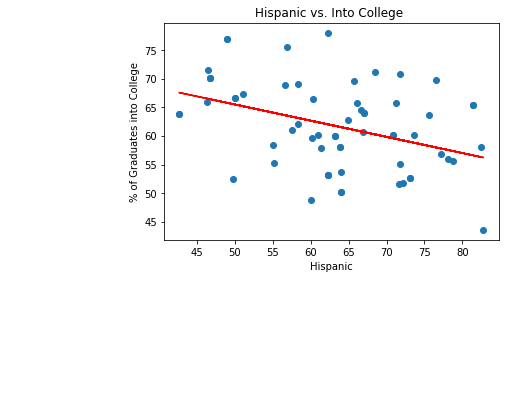

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


71.06914365606448
The r-value is: 0.13303384239624857
The intercept value is: 71.06914365606448
The p-value is: 0.06694601282890827


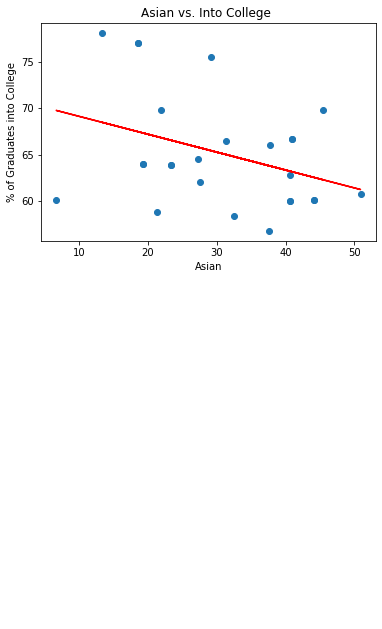

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


146.1934352690953
The r-value is: 0.4509041004800731
The intercept value is: 146.1934352690953
The p-value is: 9.149194775013158e-05


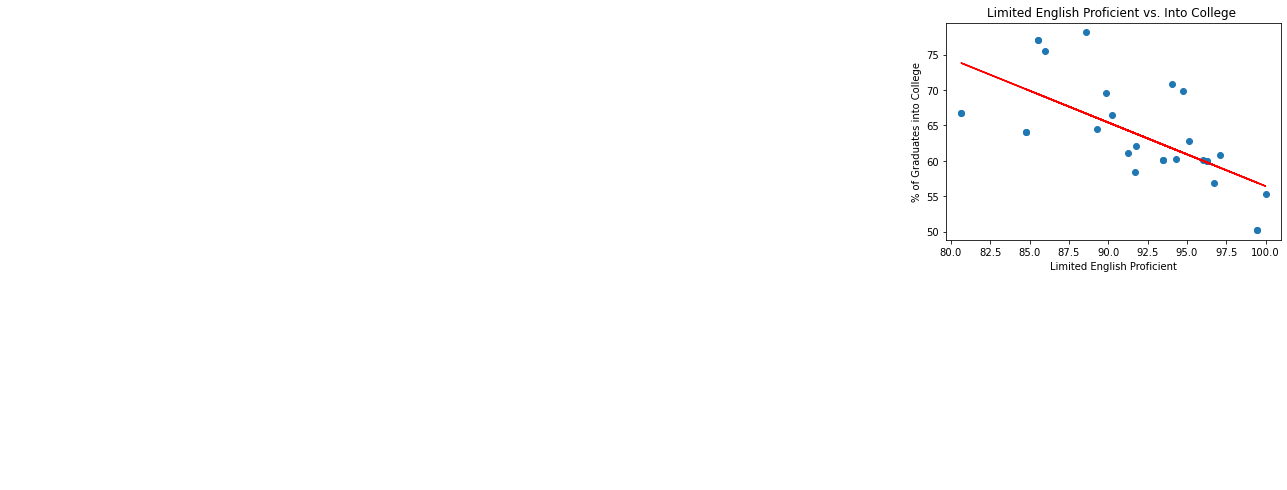

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


81.31728497484302
The r-value is: 0.22438054323652043
The intercept value is: 81.31728497484302
The p-value is: 0.003520841148225955


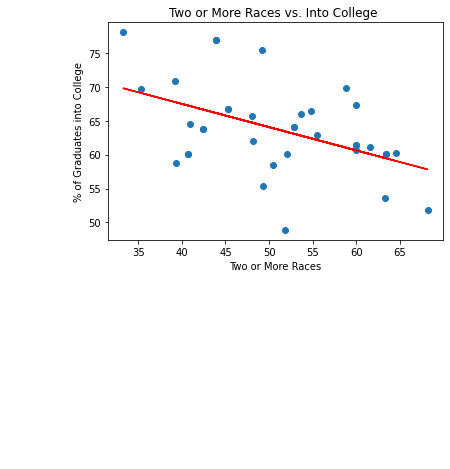

C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Tako\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


ValueError: Inputs must not be empty.

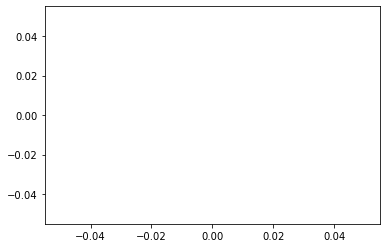

In [25]:
description_list = merged_subgroup['SUBGROUP_NAME'].unique()
description_list

for description in description_list:
    bar_graph(merged_subgroup,description)